# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


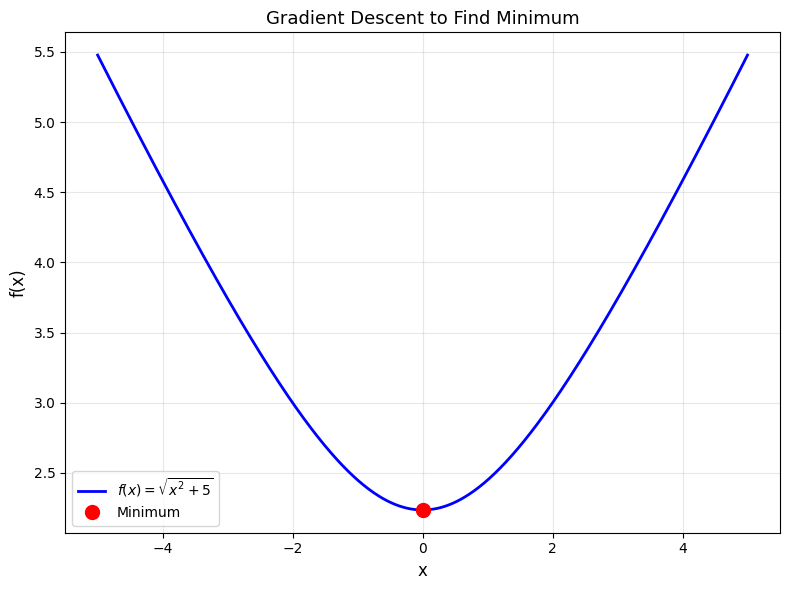

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
#Objective function: f(x) = sqrt(x^2 + 5)
    return np.sqrt(x**2 + 5)


# Plot the function f(x), np.linspace might be helpful
x_range = np.linspace(-5, 5, 500)
y_range = f(x_range)

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, 'b-', linewidth=2, label=r'$f(x) = \sqrt{x^2 + 5}$')
plt.plot(0, np.sqrt(5), 'ro', markersize=10, label='Minimum')
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Gradient Descent to Find Minimum', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Initial guess: x_0 = 1/5 + 1 = 1.2

After 50 iterations:
x_T = x_50 = 0.0000000000
f(x_T) = 2.2360679775
True minimum: f(0) = 2.2360679775


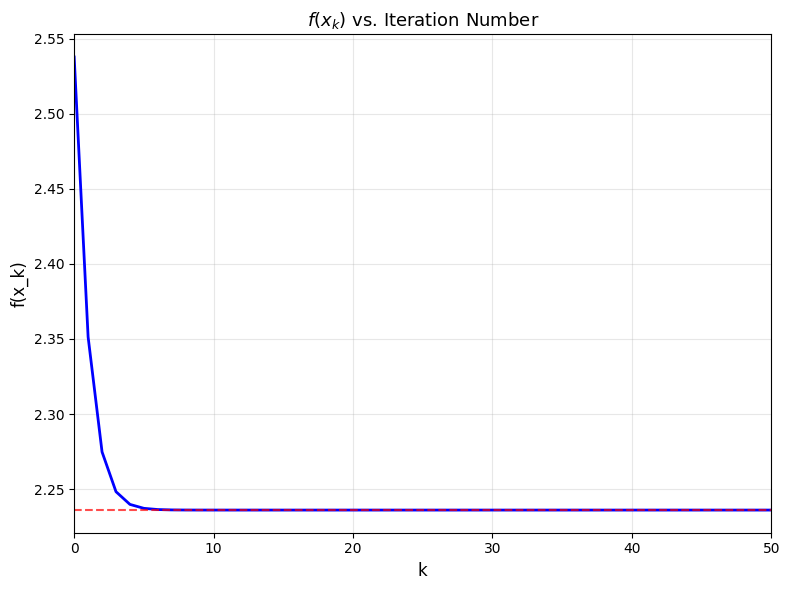

In [2]:
# Define the derivative of the function f(x), for gradient descent
def grad_f(x):
# Gradient of f(x): f'(x) = x / sqrt(x^2 + 5)
    return x / np.sqrt(x**2 + 5)


# Write a function to run the Gradient Descent Algorithm
# Take input arguments x_0, step_size, and num_iterations
# Return a list/array of x_k values
def gradient_descent(x_0, step_size, num_iterations):
# Performs gradient descent and returns trajectory of x values
    x_values = np.zeros(num_iterations + 1)
    x_values[0] = x_0

    for k in range(num_iterations):
        x_values[k + 1] = x_values[k] - step_size * grad_f(x_values[k])

    return x_values


# Set up/assign initial values
last_digit = 1
x_0 = last_digit / 5 + 1
step_size = 1
num_iterations = 50

print(f"Initial guess: x_0 = {last_digit}/5 + 1 = {x_0}")


# Run gradient descent by calling the function
x_trajectory = gradient_descent(x_0, step_size, num_iterations)


# Report x_T by printing out the value
x_T = x_trajectory[-1]
print(f"\nAfter {num_iterations} iterations:")
print(f"x_T = x_{num_iterations} = {x_T:.10f}")
print(f"f(x_T) = {f(x_T):.10f}")
print(f"True minimum: f(0) = {np.sqrt(5):.10f}")


# Plot the f(x_k) values vs. iteration number
f_trajectory = f(x_trajectory)

plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations + 1), f_trajectory, 'b-', linewidth=2)
plt.axhline(y=np.sqrt(5), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
plt.xlabel('k', fontsize=12)
plt.ylabel('f(x_k)', fontsize=12)
plt.title(r'$f(x_k)$ vs. Iteration Number', fontsize=13)
plt.grid(True, alpha=0.3)
plt.xlim(0, num_iterations)
plt.tight_layout()
plt.show()

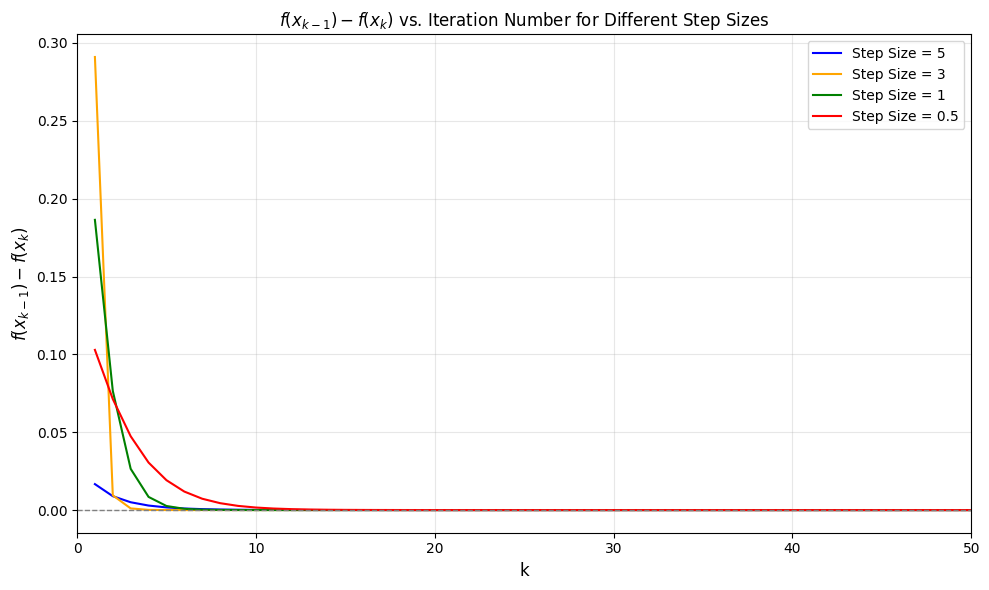


Analysis: Is f(x_{k-1}) - f(x_k) always positive?

α = 5:
  Always positive? YES
  Range: [0.000000, 0.016671]

α = 3:
  Always positive? YES
  Range: [0.000000, 0.290988]

α = 1:
  Always positive? YES
  Range: [0.000000, 0.186392]

α = 0.5:
  Always positive? YES
  Range: [0.000000, 0.102872]


In [5]:
# Create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]


# Initialize a list to store the results from different step sizes
results = []  # will store tuples of (step_size, differences)


# Loop through the step sizes and perform GD and record results
for alpha in step_sizes:
    x_vals = gradient_descent(x_0, alpha, num_iterations)
    f_vals = f(x_vals)

    # Calculate f(x_{k-1}) - f(x_k) for each iteration
    differences = []
    for k in range(1, num_iterations + 1):
        diff = f_vals[k - 1] - f_vals[k]
        differences.append(diff)

    results.append((alpha, differences))


# Plot multiple curves in a single graph
colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 6))

for i, (alpha, differences) in enumerate(results):
    plt.plot(range(1, num_iterations + 1), differences,
             color=colors[i], linewidth=1.5, label=f'Step Size = {alpha}')

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.xlabel('k', fontsize=12)
plt.ylabel(r'$f(x_{k-1}) - f(x_k)$', fontsize=12)
plt.title(r'$f(x_{k-1}) - f(x_k)$ vs. Iteration Number for Different Step Sizes', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, num_iterations)
plt.tight_layout()
plt.show()


# Analysis: Check if f(x_k) is always decreasing
print("\nAnalysis: Is f(x_{k-1}) - f(x_k) always positive?")
print("=" * 60)

for alpha, differences in results:
    min_diff = min(differences)
    max_diff = max(differences)
    always_positive = all(d >= 0 for d in differences)

    status = "YES" if always_positive else "NO"
    print(f"\nα = {alpha}:")
    print(f"  Always positive? {status}")
    print(f"  Range: [{min_diff:.6f}, {max_diff:.6f}]")


For this initial point (x_0 = 1.2), all tested step sizes maintain monotonic convergence. The initial point is close enough to the minimum that even α = 5 doesn't cause overshooting This demonstrates that step size requirements depend on both the function properties and the starting point distance from optimum.

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)





## Normal Equation

For linear regression, we want to find parameters $\theta$ that minimize:

$$\min_{\theta} \|X\theta - y\|^2$$

The **normal equation** provides the closed-form solution:

$$\theta = (X^T X)^{-1} X^T y$$

where:
- $X$ is the design matrix (with bias column)
- $y$ is the target vector
- $\theta$ contains the intercept and coefficients

Linear Regression Parameters (Normal Equation)
Intercept: 3.9283047167
Coefficients: [4.12719376 0.48972880]

Regression equation:
y = 3.9283 + 4.1272*x1 + 0.4897*x2


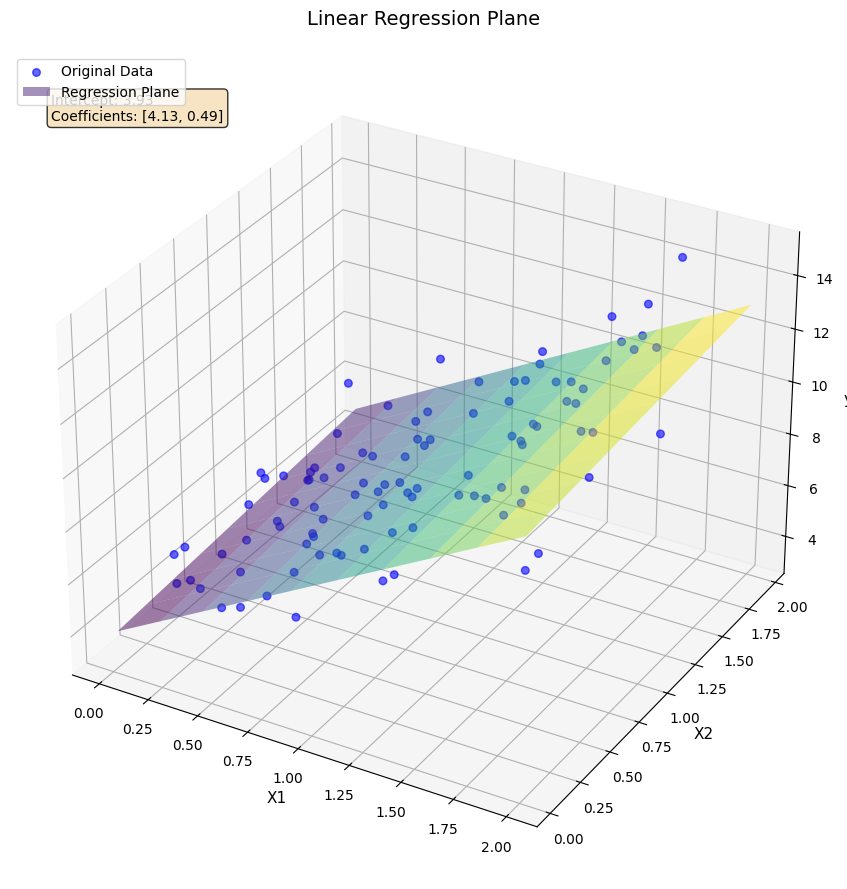

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(41)  # My SBU ID last 2 digits
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # Add x0 = 1 to each instance


# Find theta using the normal equation
# theta = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


# Print the intercept and coefficients of the regression plane
print("Linear Regression Parameters (Normal Equation)")
print("="*50)
print(f"Intercept: {theta[0]:.10f}")
print(f"Coefficients: [{theta[1]:.8f} {theta[2]:.8f}]")
print("\nRegression equation:")
print(f"y = {theta[0]:.4f} + {theta[1]:.4f}*x1 + {theta[2]:.4f}*x2")


# Plot the generated data and the regression plane
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], y, c='blue', marker='o', s=30, alpha=0.6, label='Original Data')

# Create meshgrid for the regression plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Calculate predicted y values for the plane
y_mesh = theta[0] + theta[1] * x1_mesh + theta[2] * x2_mesh

# Plot the regression plane
ax.plot_surface(x1_mesh, x2_mesh, y_mesh, alpha=0.5, cmap='viridis',
                edgecolor='none', label='Regression Plane')

# Labels and title
ax.set_xlabel('X1', fontsize=11)
ax.set_ylabel('X2', fontsize=11)
ax.set_zlabel('y', fontsize=11)
ax.set_title('Linear Regression Plane', fontsize=14, pad=20)
ax.legend(loc='upper left', fontsize=10)

# Add text box with parameters
textstr = f'Intercept: {theta[0]:.2f}\nCoefficients: [{theta[1]:.2f}, {theta[2]:.2f}]'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text2D(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
          verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

The regression plane equation is:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

This plane minimizes the sum of squared errors between predicted and actual values.

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.


We are using logistic regression with gradient descent optimization for Binary classification.


**Logistic function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Prediction:**
$$\hat{y} = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$$

**Cost function (Binary Cross-Entropy):**
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})]$$

**Gradient:**
$$\frac{\partial J}{\partial \theta} = \frac{1}{m}X^T(\hat{y} - y)$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid (logistic) function
def sigmoid(z):
# Apply sigmoid activation: σ(z) = 1/(1+e^(-z))
    return 1 / (1 + np.exp(-z))

# Generate synthetic dataset with known parameters
np.random.seed(41)
X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1.0

# Generate labels based on true parameters
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)
Y = (probabilities > 0.5).astype(int)

# Add noise to features
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split into training and test sets (80/20 split)
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize parameters
w = np.zeros(X.shape[0])  # Weight vector
b = 0.0  # Bias term

# Set hyperparameters
learning_rate = 0.5
num_epochs = 1000

# Training loop: Gradient descent optimization
for epoch in range(num_epochs):
    # Forward pass: compute predictions
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute gradients using chain rule
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update parameters using gradient descent
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb

# Evaluate on training set
A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)

# Evaluate on test set
A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)

# Calculate accuracy metrics
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.95
Test Set Accuracy: 0.90


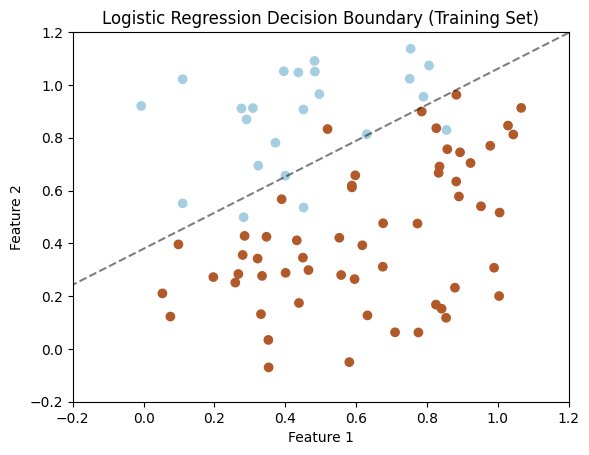

In [20]:
# Plot training data with learned decision boundary
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
ax = plt.gca()

# Create meshgrid for decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute decision boundary (probability = 0.5)
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# Plot decision boundary as contour line
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Training Set)')
plt.show()

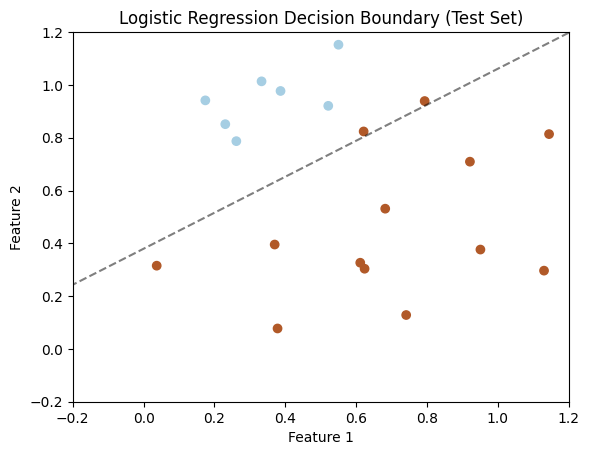

In [21]:
# Plot test data with learned decision boundary
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))

# Compute decision boundary using learned parameters
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (Test Set)')
plt.show()


- Learning rate: 0.5
- Number of epochs: 1000
- A learning rate of 0.5 provides fast convergence while maintaining stability. 1000 epochs ensures the parameters converge to near-optimal values. These values achieve high accuracy on both training and test sets
